## First look at altimetry waveforms for two different satellites ##

** Import libraries **

In [1]:
import os
import numpy as np
from netCDF4 import Dataset
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import dates
%matplotlib inline
from mpl_toolkits.basemap import Basemap

plt.rcParams["figure.figsize"] = (16,10)
plt.ioff()

** Jason-3 **

classical, "Brown" waveform (over ocean)

lat_20, lon_20, swh 32.718517 294.608455 0.872


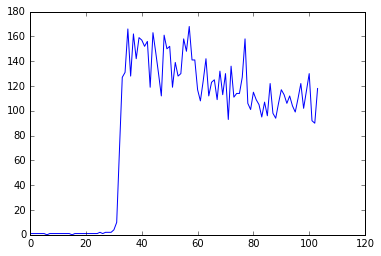

In [2]:
#try and look for waveforms at different indexes (first index is the array at 1Hz, second is the index within the 20Hz array)
#most of the track used is over calm seas (except around 55°S)
input_root = '../data/'
input_path = ''
input_file = 'JA3_GPS_2PdP050_126_20170622_042327_20170622_051940.nc'
my_file    = os.path.join(input_root,input_path,input_file)
nc = Dataset(my_file, 'r')

lat_20 = nc.variables['lat_20hz'][:]
lon_20 = nc.variables['lon_20hz'][:]
swh_ku = nc.variables['swh_ku'][:]
wvf_ind= nc.variables['wvf_ind'][:]
waveforms_20hz_ku = nc.variables['waveforms_20hz_ku'][:]
print('lat_20, lon_20, swh', lat_20[1000,10],lon_20[1000,10],swh_ku[1000])
fig = plt.figure()
plt.plot(wvf_ind, waveforms_20hz_ku[1000,10,:])
plt.show()

** Sentinel-3 **

Delay-Doppler (SAR) waveform, peakier than the "conventional" one over ocean.

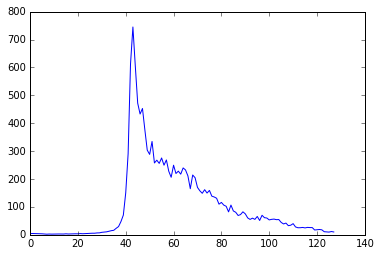

In [3]:
input_root = '../data/'
input_path = 'S3A_SR_2_WAT____20170809T144623_20170809T153306_20170904T084235_2802_021_025______MAR_O_NT_002.SEN3'
input_file = 'enhanced_measurement.nc'
my_file    = os.path.join(input_root,input_path,input_file)
nc = Dataset(my_file, 'r')

echo_sample_ind = nc.variables['echo_sample_ind'][:]
waveform_20_ku = nc.variables['waveform_20_ku'][:]
fig = plt.figure()
plt.plot(echo_sample_ind, waveform_20_ku[3000,:])
plt.show()
#try and look for waveforms at different indexes 

### SWH and waveform shapes ###

storms crosses the North Atlantic late 2017 / beginning 2018 (as every winter). 
Try to visualize waveforms inside and outside the storm for both satellites.

max swh ku for the track 20.0


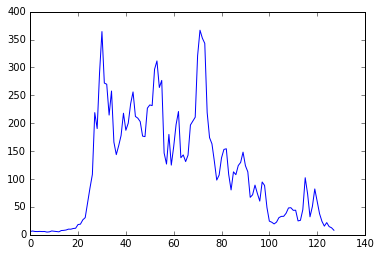

In [4]:
input_root = '../data/'
input_path = 'S3A_SR_2_WAT____20180115T223136_20180115T224108_20180115T235013_0572_026_372______MAR_O_NR_003.SEN3'
input_file = 'enhanced_measurement.nc'
my_file    = os.path.join(input_root,input_path,input_file)
nc = Dataset(my_file, 'r')

# read the variables
echo_sample_ind = nc.variables['echo_sample_ind'][:]
waveform_20_ku = nc.variables['waveform_20_ku'][:]
swh_ocean_20_ku = nc.variables['swh_ocean_20_ku'][:]

print('max swh ku for the track', max(swh_ocean_20_ku))
highwaves = np.where( swh_ocean_20_ku == max(swh_ocean_20_ku) )
highwaves_index=int(highwaves[0])
wvf = waveform_20_ku[highwaves_index][:]
fig = plt.figure()
plt.plot(echo_sample_ind,wvf)
plt.show()
#try and look for waveforms at different indexes 


max swh 16.264


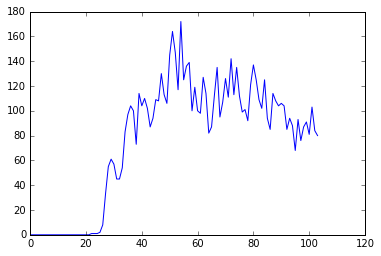

In [5]:
import numpy.ma as ma #to deal with masked arrays

input_root = '../data/'
input_path = ''
input_file = 'JA3_IPS_2PdP071_113_20180115_214143_20180115_223756.nc'
my_file    = os.path.join(input_root,input_path,input_file)
nc = Dataset(my_file, 'r')

wvf_ind= nc.variables['wvf_ind'][:]
waveforms_20hz_ku = nc.variables['waveforms_20hz_ku'][:]
swh_ku = nc.variables['swh_ku'][:]
surface_type = nc.variables['surface_type'][:]
mask = ( surface_type == 0 )
highwaves = ma.where( swh_ku[mask] == ma.max(swh_ku[mask]) )
print('max swh', ma.max(swh_ku[mask]))
highwaves_index=int(highwaves[0])
wvf = waveforms_20hz_ku[highwaves_index,0,:]
fig = plt.figure()
plt.plot(wvf_ind,wvf)
plt.show()